In [46]:
#libraries imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_rows',None) 
pd.pandas.set_option('display.max_columns',None)





In [52]:
#Answer 1
#loading the dataset
df=pd.read_csv("data.csv")
#this command shows the number of values missing in the various columns
print(df.isnull().sum())
#my strategy is to fill with imputation
updated_df= df
updated_df['radius_mean']=updated_df['radius_mean'].fillna(updated_df['radius_mean'].mean())
updated_df['area_mean']=updated_df['area_mean'].fillna(updated_df['area_mean'].mean())
updated_df.head()


id                          0
diagnosis                   0
radius_mean                28
texture_mean                0
perimeter_mean              0
area_mean                  41
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave_points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_sd                   0
texture_sd                  0
perimeter_sd                0
area_sd                     0
smoothness_sd               0
compactness_sd              0
concavity_sd                0
concave_points_sd           0
symmetry_sd                 0
fractal_dimension_sd        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_sd,texture_sd,perimeter_sd,area_sd,smoothness_sd,compactness_sd,concavity_sd,concave_points_sd,symmetry_sd,fractal_dimension_sd,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99000,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57000,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69000,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,14.17541,20.38,77.58,659.519697,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29000,14.34,135.10,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


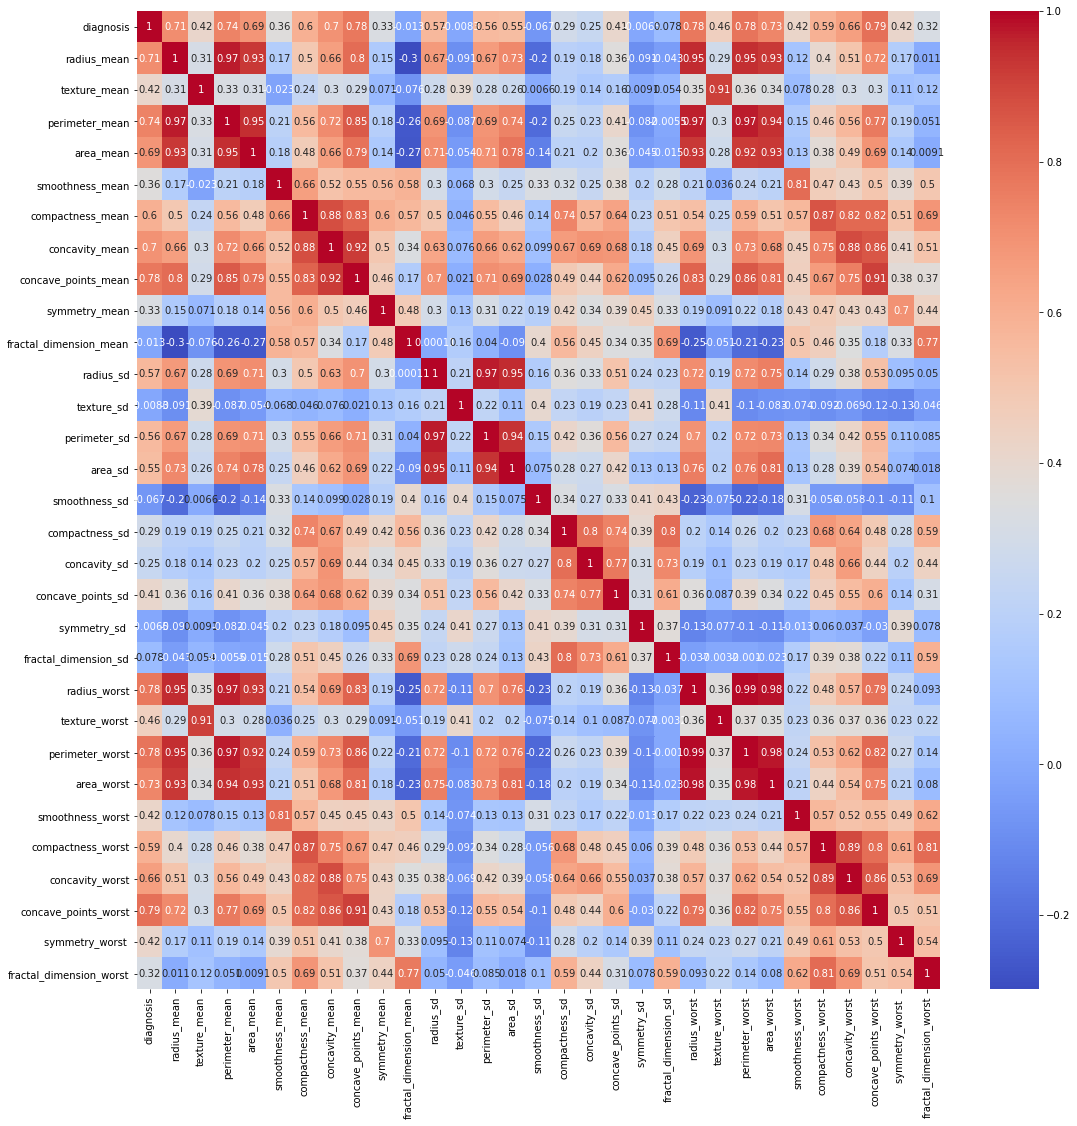

In [56]:
# Answer 4
#preprocossing
#dropping the id column and removing the columns having NaN values
df = df.drop(['id'], axis=1)
#encoding the the target feature
df['diagnosis']= df['diagnosis'].replace('M', 1)
df['diagnosis']= df['diagnosis'].replace('B', 0)
#plotting the corellation matrix
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()
#Ans 2
#stats using correlation
cc=corr[abs(corr['diagnosis']) > 0.5].index
acc=df[df.columns[:]].corr()['diagnosis']
print('All features  with thier correlations is: \n',acc)

In [59]:
#finding out the positively corelated feature
cc=corr[abs(corr['diagnosis']) > 0.5].index
print('- Number of most correlated features = ', len(cc))
print('--------------------------------------------------')
print('- Most correlated features is: \n ',cc)
#finding out the negatively corelated feature
cc2=corr[abs(corr['diagnosis']) <= 0.5].index
print('- Number of Least correlated features = ', len(cc2))
print('--------------------------------------------------')
print('- Least correlated features is: \n ',cc2)
#selecting 15 most essential features
df = df[['diagnosis', 'radius_mean', 'area_mean',
       'compactness_mean', 'concavity_mean',
       'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst','texture_mean', 
         'smoothness_mean', 'symmetry_mean',
         'texture_worst', 'smoothness_worst',
       'fractal_dimension_worst']]
df.head()

- Number of most correlated features =  16
--------------------------------------------------
- Most correlated features is: 
  Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'radius_sd', 'perimeter_sd', 'area_sd', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst'],
      dtype='object')
- Number of Least correlated features =  15
--------------------------------------------------
- Least correlated features is: 
  Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_sd', 'smoothness_sd',
       'compactness_sd', 'concavity_sd', 'concave_points_sd', 'symmetry_sd ',
       'fractal_dimension_sd', 'texture_worst', 'smoothness_worst',
       'symmetry_worst ', 'fractal_dimension_worst'],
      dtype='object')


,diagnosis,radius_mean,area_mean,compactness_mean,concavity_mean,perimeter_worst,area_worst,compactness_worst,concavity_worst,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,fractal_dimension_worst
0,1,17.99000,1001.000000,0.27760,0.3001,184.60,2019.0,0.6656,0.7119,10.38,0.11840,0.2419,17.33,0.1622,0.11890
1,1,20.57000,1326.000000,0.07864,0.0869,158.80,1956.0,0.1866,0.2416,17.77,0.08474,0.1812,23.41,0.1238,0.08902
2,1,19.69000,1203.000000,0.15990,0.1974,152.50,1709.0,0.4245,0.4504,21.25,0.10960,0.2069,25.53,0.1444,0.08758
3,1,14.17541,659.519697,0.28390,0.2414,98.87,567.7,0.8663,0.6869,20.38,0.14250,0.2597,26.50,0.2098,0.17300
4,1,20.29000,1297.000000,0.13280,0.1980,152.20,1575.0,0.2050,0.4000,14.34,0.10030,0.1809,16.67,0.1374,0.07678


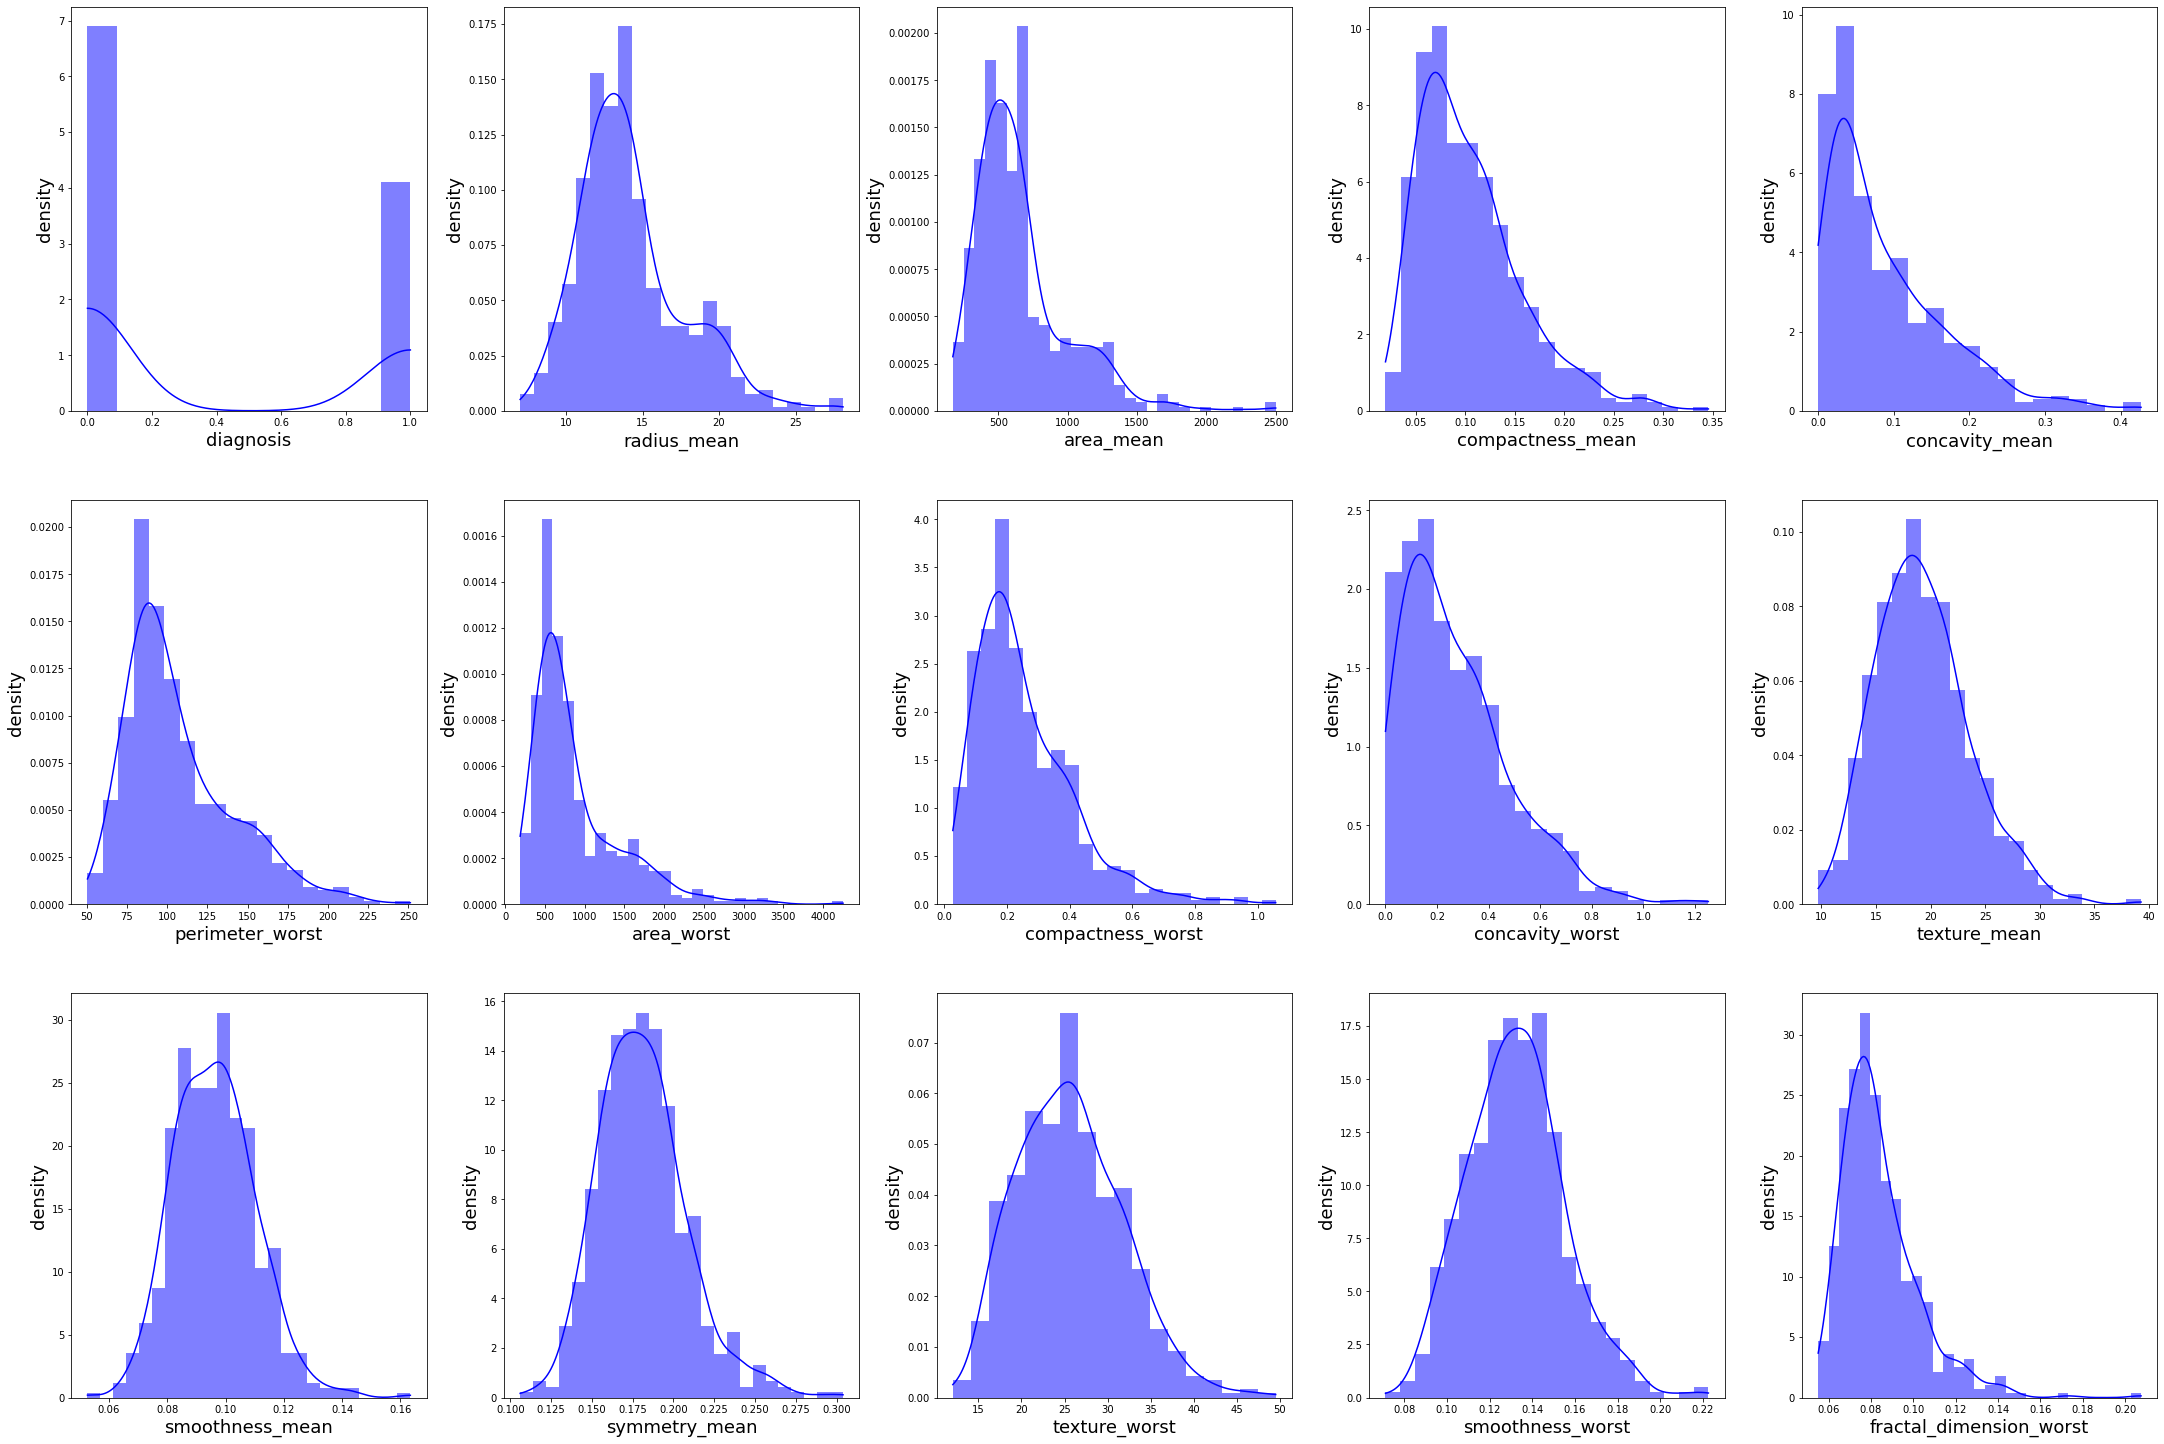

In [63]:
#Ans 5
# create hist
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(30,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    col_dist = sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)